In [1]:
from numpy import random
from math import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from collections import Counter

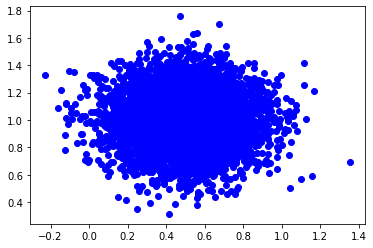

40.09385833629186


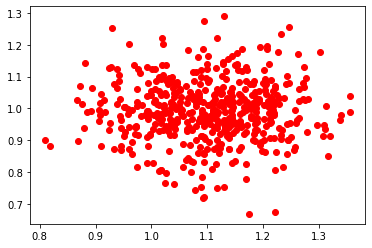

In [2]:
majority_c1= 0.5
majority_std_deviation= 0.2
majority_c2= 1
majority_size=4500

percentage= 40
minority_std_deviation= 0.1
minority_c1= majority_c1 + (1 - percentage/100)
minority_c2= 1
minority_size=500

while True:
  x_1=[]
  y_1=[]
  for _ in range(0,majority_size):
    x_1.append(random.normal()*majority_std_deviation + majority_c1)
    y_1.append(random.normal()*majority_std_deviation + majority_c2)
  min_x1= min(x_1)
  min_y1= min(y_1)
  center_x= sum(x_1)/len(x_1)
  center_y= sum(y_1)/len(y_1)
  max_x1=max(x_1)
  max_y1=max(y_1)

  x_2=[]
  y_2=[]
  for _ in range(0,minority_size):
    x_2.append(random.normal()*minority_std_deviation + minority_c1)
    y_2.append(random.normal()*minority_std_deviation + minority_c2)
  min_x2= min(x_2)
  min_y2= min(y_2)

  max_1= max(x_1)
  min_2= min(x_2)
  max_2= max(x_2)

  percentage_overlapping= (max_1-min_2)/max_2*100
  if percentage_overlapping <= percentage + 0.3 and percentage_overlapping >= percentage - 0.3:
    break
majority_data = pd.DataFrame({'x': x_1,'y': y_1})
plt.plot(x_1, y_1, 'bo')
plt.show()
print(percentage_overlapping)
minority_data = pd.DataFrame({'x': x_2,'y': y_2})
plt.plot(x_2, y_2, 'ro')
plt.show()

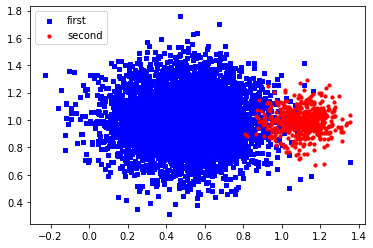

40.09385833629186


In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x_1, y_1, s=10, c='b', marker="s", label='first')
ax1.scatter(x_2,y_2, s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left');
plt.show()
print(percentage_overlapping)

In [4]:
Dataset= majority_data.append(minority_data, ignore_index=True)
majority_y=['Positive'] * majority_size
minority_y=['Negative'] * minority_size
y=majority_y + minority_y
X_train, X_test, y_train, y_test = train_test_split(Dataset, y, test_size=0.33, random_state=1)

In [5]:
x_3=[]
y_3=[]
center_x= sum(x_2)/len(x_2)
center_y= sum(y_2)/len(y_2)
increased_minority_size= Counter(y_train)['Positive'] - Counter(y_train)['Negative']
for _ in range(0,increased_minority_size):
  x_3.append(random.normal()*minority_std_deviation + center_x)
  y_3.append(random.normal()*minority_std_deviation + center_y)
min_x3= min(x_3)
min_y3= min(y_3)

minority_data_increased = pd.DataFrame({'x': x_3,'y': y_3})
minority_data= minority_data.append(minority_data_increased, ignore_index=True)
min_x3= min(x_3)
min_y3= min(y_3)

In [6]:
center_x= sum(x_3)/len(x_3)
center_y= sum(y_3)/len(y_3)

print(center_x)
print(center_y)

1.1018128181094067
0.9908367536502679


In [7]:
x_1=[]
y_1=[]
x_2=[]
y_2=[]
for x,y,val in zip(X_train['x'],X_train['y'],y_train):
  if val == "Positive":
    x_1.append(x)
    y_1.append(y)
  else:
    x_2.append(x)
    y_2.append(y)

majority_data = pd.DataFrame({'x': x_1,'y': y_1})
minority_data = pd.DataFrame({'x': x_2,'y': y_2})
minority_data= minority_data.append(minority_data_increased, ignore_index=True)

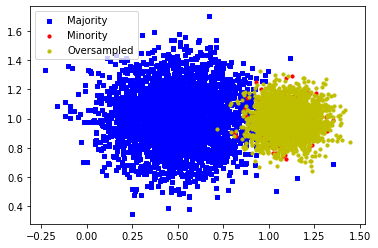

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x_1, y_1, s=10, c='b', marker="s", label='Majority')
ax1.scatter(x_2, y_2, s=10, c='r', marker="o", label='Minority')
ax1.scatter(x_3, y_3, s=10, c='y', marker="o", label='Oversampled')
plt.legend(loc='upper left');
plt.show()

In [9]:
print(majority_data.shape)
print(minority_data.shape)

(3010, 2)
(3010, 2)


In [10]:
Dataset= majority_data.append(minority_data, ignore_index=True)
majority_y=['Positive'] * majority_data.shape[0]
minority_y=['Negative'] * minority_data.shape[0]
y=majority_y + minority_y
X_train, y_train = Dataset,y

In [11]:
print(X_train.shape)
print(X_test.shape)
print(len(y_train))
print(len(y_test))

print(Counter(y))

(6020, 2)
(1650, 2)
6020
1650
Counter({'Positive': 3010, 'Negative': 3010})


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [14]:
y_pred  =  classifier.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [16]:
print(ac)
print(cm)

0.9751515151515151
[[ 160    0]
 [  41 1449]]


In [17]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.9802201115633952, 0.9751515151515151, 0.9763892564977225, None)

In [18]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [19]:
y_pred = classifier.predict(X_test) 
cm = confusion_matrix(y_test, y_pred)
print ("Accuracy : ", accuracy_score(y_test, y_pred))
print(cm)

Accuracy :  0.9769696969696969
[[ 160    0]
 [  38 1452]]


In [20]:
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.9813896541169269, 0.9769696969696969, 0.9780432415101189, None)

In [21]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [22]:
y_pred = classifier.predict(X_test) 
cm = confusion_matrix(y_test, y_pred)
print ("Accuracy : ", accuracy_score(y_test, y_pred))
print(cm)

Accuracy :  0.9769696969696969
[[ 160    0]
 [  38 1452]]


In [23]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.9813896541169269, 0.9769696969696969, 0.9780432415101189, None)

In [24]:
print(percentage_overlapping)

40.09385833629186
